### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [9]:
y_train[0:2]

array([9, 0], dtype=uint8)

#### Change train and test labels into one-hot vectors

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
trainY[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Build the Graph

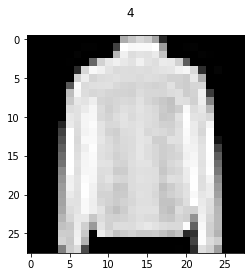

In [21]:
#Lets print the image as well
import matplotlib.pyplot as plt
import numpy as np

img_num = np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

#### Initialize model, reshape & normalize data

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 -- -This step will be used only if 
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Add 1st hidden FC layer
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

#Add 2nd hidden FC layer
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [18]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(x_train,trainY,          
          validation_data=(x_test,testY),
          epochs=10,
          batch_size=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.5623 - accuracy: 0.7992 - val_loss: 0.4328 - val_accuracy: 0.8435
Epoch 2/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.4411 - accuracy: 0.8409 - val_loss: 0.4138 - val_accuracy: 0.8503
Epoch 3/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.4048 - accuracy: 0.8527 - val_loss: 0.3642 - val_accuracy: 0.8620
Epoch 4/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3826 - accuracy: 0.8593 - val_loss: 0.3664 - val_accuracy: 0.8678
Epoch 5/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3680 - accuracy: 0.8660 - val_loss: 0.3686 - val_accuracy: 0.8671
Epoch 6/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.3521 - accuracy: 0.8714 - val_loss: 0.3446 - val_accuracy: 0.8707
Epoch 7/10
60000/60000 [========================

In [24]:
# Final validation

train_loss, train_accuracy = model.evaluate(x_train,trainY)
test_loss, test_accuracy  = model.evaluate(x_test,testY)

print('\ntraining score of the model: Loss: ',train_loss, 'Accuracy: ', train_accuracy)
print('testing score of the model: Loss: ',test_loss, 'Accuracy: ', test_accuracy)


10000/10000 [==============================] - 1s 61us/sample - loss: 0.3389 - accuracy: 0.8821

training score of the model: Loss:  0.24013184207876523 Accuracy:  0.9088333
testing score of the model: Loss:  0.3388922101020813 Accuracy:  0.8821
